# Quick and dirty method for creating labeled face images
This is a really simple way to create labeled images, but it has a lot of limitations. I'd recommend not using this and using the app I made instead.  
https://github.com/ablacklama/FaceLabeler  
It's better in every way and has a real GUI.  

### Instructions
If you insist on using this garbage fire of a program, here's how:

arrow keys are used to select one of the 4 hard coded labels (Neutral, Happy, Sad, Angry). Each time you press an arrow key, it will grab the currect frame and desplay the frame with a box around the face it detects. No box is there if no face is detected.

It will also show you the label you've selected and the number of each label that are currently saved. This is shown as an array, if i'd cared, i'd have labeled the array. 

The space bar is how you save the images with the selected array, if a frame with a face in it is currently desplayed, space will save that image with the current label. If you've already saved that image, space will get another image with the same label. So if you just keep slamming that space button, you will save an image with the current label every two presses. What a simple, intuitive, and not garbage solution.

Exiting the program. See that "X" in the top right of the window? It can't help you here. It does it's best, but my code won't be closed so easily. To actually close the window for good, just press 'esc'.

In [1]:
import cv2
import numpy as np
import csv
import threading
from matplotlib import pyplot as plt
from keyboard import is_pressed
import csv
import os.path
from collections import Counter

faces found:  1


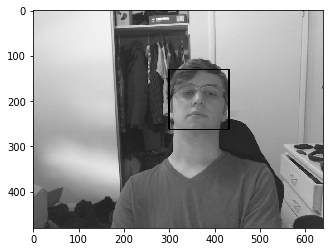

In [2]:
# initialize cascada classifier
haar_cascade = cv2.CascadeClassifier(
    'data/haarcascade/haarcascade_frontalface_default.xml')

#initialize default. Change int argument to change webcam used.
cam = cv2.VideoCapture(0)

if cam.isOpened():
    #read img from camera and make a gray version for the cascada classifier
    ret_val, img = cam.read()
    
    if ret_val:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #use the classifier to detect faces. Returns face box coordinates for each face
        faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        print("faces found: ", len(faces))

        #for each face, draw a rectangle around it
        for (x, y, w, h) in faces:     
                 cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # display the img
        plt.imshow(gray,cmap="gray")

In [11]:
def display(img,faces,numImages,lastlabel,saving):
    disp_img = np.copy(img)
    if len(faces) == 1:
        x,y,w,h = faces[0]
        savestr = ""
        if saving:
            savestr = "SAVED"
        cv2.rectangle(disp_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(disp_img,lastlabel + "  {}".format(str(numImages)) + savestr,
                            (x,y-5),cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0)) 
    return disp_img
    
    
def label(savepath="Images",smoothCapture=False):
    haar_cascade = cv2.CascadeClassifier(
            'data/haarcascade/haarcascade_frontalface_default.xml')
    csvFileWriter = None
    csvFile = None
    labels = ["Neutral", "Happy", "Sad","Angry"]


    num = 0
    csvFile = open('data/faceLabels.csv', 'a+')

    l = np.array(list(csv.reader(csvFile)))
    if l.shape[0] > 0:
        labelCount = Counter(l[:, 1])
        num = int(l[-1, 0][4:-4]) + 1
    else:
        labelCount = {}




    csvFileWriter = csv.writer(csvFile, delimiter=',',
                               quotechar='|', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')

    cam = cv2.VideoCapture(smoothCapture)
    lastlabel = "Neutral"
    numImages = []
    for label in labels:
        if label in labelCount.keys():
            numImages.append(labelCount[label])
        else:
            numImages.append(0)
    lastlabelidx = 0
    saving = False

    faceimg = None
    
    while True:
        key = cv2.waitKeyEx(False)
        if key == ord(' ') and saving == False and faceimg is not None:
                saving = True
                numImages[lastlabelidx] += 1
                imgName = "face"+str(num)+'.png'
                cv2.imwrite(savepath + "/" + imgName,faceimg)
                csvFileWriter.writerow([imgName,lastlabel])
                num += 1
                disp_img = display(img,faces,numImages,lastlabel,saving)
        else:        
            saving = False
            ret_val, img = cam.read()
            img = cv2.flip(img,1)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
            faceimg = None
            if len(faces) == 1:
                x,y,w,h = faces[0]
                faceimg = gray[y:y+h,x:x+w]
                if key == 2424832:
                    lastlabel = "Neutral"
                    lastlabelidx = 0
                elif key == 2490368:
                    lastlabel = "Happy"
                    lastlabelidx = 1
                elif key == 2621440:
                    lastlabel = "Sad"
                    lastlabelidx = 2
                elif key == 2555904:
                    lastlabel = "Angry"
                    lastlabelidx = 3
                    
            disp_img = display(img,faces,numImages,lastlabel,saving)
            
            
                
            
            
        cv2.imshow('my webcam', disp_img)
        
        
        if key == 27: 
            break  # esc to quit
    del csvFile
    cv2.destroyAllWindows()
    cam.release()
    return

In [12]:
 label()